### Credits:
- https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29
- https://medium.com/@cxu24/why-dimensionality-reduction-is-important-dd60b5611543
- https://umap-learn.readthedocs.io/en/latest/parameters.html

## Why Dimensionality Reduction



- In machine learning, to catch useful indicators and obtain a more accurate result, we tend to add as many features as possible at first. However, after a certain point, the performance of the model will decrease with the increasing number of elements. This phenomenon is often referred to as “The Curse of Dimensionality.”


### The Curse of Dimensionality

- The curse of dimensionality occurs because the sample density decreases exponentially with the increase of the dimensionality. When we keep adding features without increasing the number of training samples as well, the dimensionality of the feature space grows and becomes sparser and sparser. Due to this sparsity, it becomes much easier to find a “perfect” solution for the machine learning model which highly likely leads to overfitting.


- Dimensionality reduction is the process of reducing the dimensionality of the feature space with consideration by obtaining a set of principal features. Dimensionality reduction can be further broken into feature selection and feature extraction.

- Feature selection tries to select a subset of the original features for use in the machine learning model. In this way, we could remove redundant and irrelevant features without incurring much loss of information.
- Feature extraction is also called feature projection. Whereas feature selection returns a subset of the original features, feature extraction creates new features by projecting the data in the high-dimensional space to a space of fewer dimensions. This approach can also derive informative and non-redundant features.

- In addition to avoiding overfitting and redundancy, dimensionality reduction also leads to better human interpretations and less computational cost with simplification of models.

### DR for Visualization
- One of the most important aspects of Dimensionality reduction, it is Data Visualization. Having to drop the dimensionality down to two or three, make it possible to visualize the data on a 2d or 3d plot, meaning important insights can be gained by analysing these patterns in terms of clusters and much more.

### Main Approaches for Dimensionality Reduction
- The two main approaches to reducing dimensionality: Projection and Manifold Learning.
- Projection: This technique deals with projecting every data point which is in high dimension, onto a subspace suitable lower-dimensional space in a way which approximately preserves the distances between the points.
- Manifold Learning: Many dimensionality reductions algorithm work by modelling the manifold on which the training instance lie; this is called Manifold learning. It relies on the manifold hypothesis or assumption, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold, this assumption in most of the cases is based on observation or experience rather than theory or pure logic.[4]

- Now let's briefly explain the three techniques: (PCA, TSNE, UMAP) before jumping into solving the use case.

## PCA
- One of the most known dimensionality reduction technique is PCA(Principal Component Analysis, this works by identifying the hyperplane which lies closest to the data and then projects the data on that hyperplane while retaining most of the variation in the data set. It tries to find a linear subspace with High variance.
- Principal Components :The axis that explains the maximum amount of variance in the training set is called the Principal Components
- The axis orthogonal to this axis is called the second principal component. As we go for higher dimensions, PCA would find a third component orthogonal to the other two components and so on, for visualization purposes we always stick to 2 or maximum 3 principal components.
- It is very important to choose the right hyperplane so that when the data is projected onto it, it the maximum amount of information about how the original data is distributed.

#### Drawbacks of PCA
- The main drawback of PCA is that it is highly influenced by outliers present in the data. Moreover, PCA is a linear projection, which means it can’t capture non-linear dependencies.


### t-SNE (T-distributed stochastic neighbour embedding)

- (t-SNE) or T-distributed stochastic neighbour embedding created in 2008 by (Laurens van der Maaten and Geoffrey Hinton) for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.
- (t-SNE) takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information. It does so by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data. t-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart.[2]

### UMAP(Uniform Manifold Approximation and Projection)

- Uniform Manifold Approximation and Projection created in 2018 by (Leland McInnes, John Healy, James Melville) is a general-purpose manifold learning and dimension reduction algorithm.
- UMAP is a nonlinear dimensionality reduction method and is very effective for visualizing clusters or groups of data points and their relative proximities.
- The significant difference with TSNE is scalability, it can be applied directly to sparse matrices thereby eliminating the need to applying any Dimensionality reduction such as PCA or Truncated SVD(Singular Value Decomposition) as a prior pre-processing step.[1]
- In the simplest sense, UMAP constructs a high dimensional graph representation of the data then optimizes a low-dimensional graph to be as structurally similar as possible.
- consider the two most commonly used parameters: n_neighbors and min_dist, which are effectively used to control the balance between local and global structure in the final projection.
- each different category is (local structure), while similar categories (example such as sandal, sneaker, and ankle boot) tend to colocate (global structure).
- While both algorithms exhibit strong local clustering and group similar categories together, UMAP much more clearly separates these groups of similar categories from each other. It's also worth noting that UMAP projection of the dataset took 4 minutes in comparison to 27 minutes with multicore t-SNE.

- The most important parameter is n_neighbors - the number of approximate nearest neighbors used to construct the initial high-dimensional graph. It effectively controls how UMAP balances local versus global structure - low values will push UMAP to focus more on local structure by constraining the number of neighboring points considered when analyzing the data in high dimensions, while high values will push UMAP towards representing the big-picture structure while losing fine detail.
- The second parameter we’ll investigate is min_dist, or the minimum distance between points in low-dimensional space. This parameter controls how tightly UMAP clumps points together, with low values leading to more tightly packed embeddings. Larger values of min_dist will make UMAP pack points together more loosely, focusing instead on the preservation of the broad topological structure.
- The biggest difference between the the output of UMAP when compared with t-SNE is this balance between local and global structure - UMAP is often better at preserving global structure in the final projection. This means that the inter-cluster relations are potentially more meaningful than in t-SNE. However, it's important to note that, because UMAP and t-SNE both necessarily warp the high-dimensional shape of the data when projecting to lower dimensions, any given axis or distance in lower dimensions still isn’t directly interpretable in the way of techniques such as PCA.


- Put simply, it is similar to t-SNE but with probably higher processing speed, therefore, faster and probably better visualization. (let’s find it out in the tutorial below)

In [1]:
import numpy as np
import pandas as pd
import time
# For plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap


# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

import seaborn as sns


In [5]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [7]:
print(X_train.shape)
print(X_train[0].shape)



(60000, 28, 28)
(28, 28)


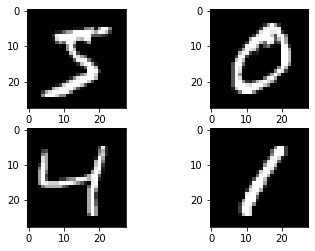

In [6]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [45]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [46]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X_train)
print(standardized_data.shape)



(60000, 784)


In [47]:
data_1000 = standardized_data[0:6000,:]
labels_1000 = y_train[0:6000]

In [48]:
start = time.time()
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_1000)
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", principalComponents.shape)
print('Duration: {} seconds'.format(time.time() - start))
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
#principal.shape

shape of pca_reduced.shape =  (6000, 3)
Duration: 0.0741569995880127 seconds


In [50]:
pca_data = np.vstack((principalComponents.T, labels_1000)).T



In [52]:
pca_data.shape

(6000, 4)

In [54]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "3rd_principal","label"))

pca_df

,1st_principal,2nd_principal,3rd_principal,label
0,-0.662602,-5.103907,1.009739,5.0
1,9.509061,-5.680480,4.276977,0.0
2,1.927639,11.394866,3.327729,4.0
3,-7.134739,-3.895222,-3.053342,1.0
4,-5.157348,4.282739,4.784935,9.0
...,...,...,...,...
5995,2.813463,11.240245,13.546367,7.0
5996,-1.537181,0.668401,-3.360426,6.0
5997,-1.199631,-10.252995,2.746253,8.0
5998,1.186299,-2.230976,-0.674485,6.0


#### Tools to Visualize the Same data (Seaborn, Plotly)

In [6]:
#via plotly
import plotly.express as px
import plotly.graph_objs as go
fig = px.scatter( pca_df,x='1st_principal', y='2nd_principal',color='label',hover_data=['label'],color_continuous_scale="rainbow_r")
fig.show()

NameError: name 'pca_df' is not defined

/Users/amimalli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


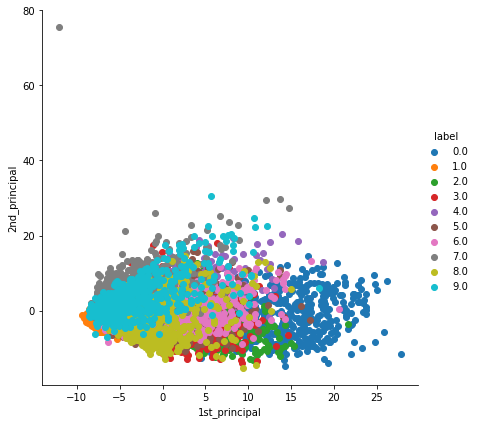

In [55]:
# via_seaborn
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


Text(0, 0.5, 'Principal Component 2')

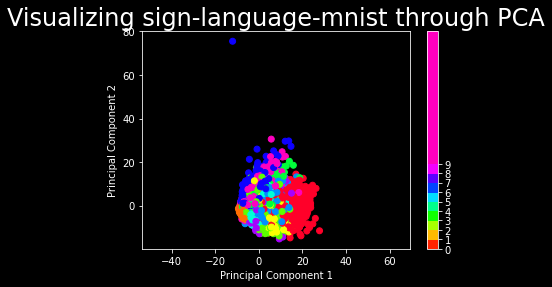

In [59]:
##via_matplotlib
plt.style.use('dark_background')
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=labels_1000, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(10))
plt.title('Visualizing sign-language-mnist through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

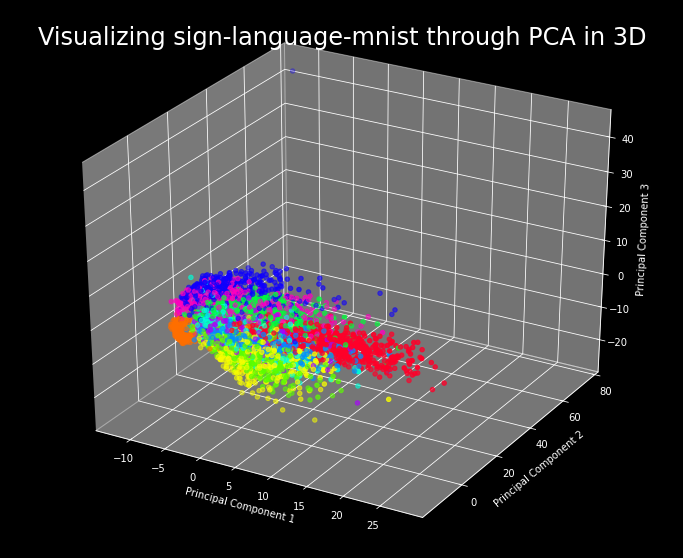

In [61]:
# Plotting PCA 3D
ax = plt.figure(figsize=(12,10)).gca(projection='3d')
ax.scatter(
    xs=principalComponents[:, 0], 
    ys=principalComponents[:, 1], 
    zs=principalComponents[:, 2], 
    c=labels_1000, 
    cmap='gist_rainbow'
)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Visualizing sign-language-mnist through PCA in 3D', fontsize=24);
plt.show()

In [5]:
fig = px.scatter_3d( pca_df,principalComponents[:, 0], principalComponents[:, 1], principalComponents[:,2],
              color='label',size_max=18)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

NameError: name 'px' is not defined

In [4]:
fig = px.scatter_3d(pca_df, x='1st_principal', y='2nd_principal', z='3rd_principal',
              color='label',size_max=18)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

NameError: name 'px' is not defined

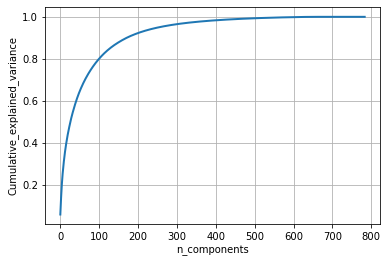

In [56]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(data_1000)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, appro

#### Using TSNE

- One thing to note down is that t-SNE is very computationally expensive, hence it is mentioned in its documentation that :
- “It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.”[2]

In [74]:
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
start = time.time()
model = TSNE(n_components=3, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000)
print('Duration: {} seconds'.format(time.time() - start))
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Dim_3","label"))




Duration: 82.1801872253418 seconds


In [ ]:
#### Visualizing via Seaborn, Plolty and Matplotlibs

/Users/amimalli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



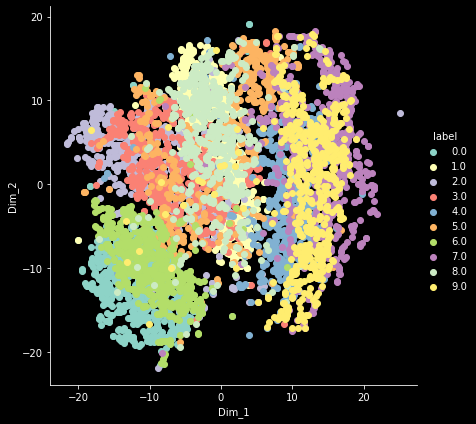

In [75]:
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [143]:
fig = px.scatter( tsne_df,x='Dim_1', y='Dim_2',color='label',hover_data=['label'],color_continuous_scale="rainbow_r")
fig.show()

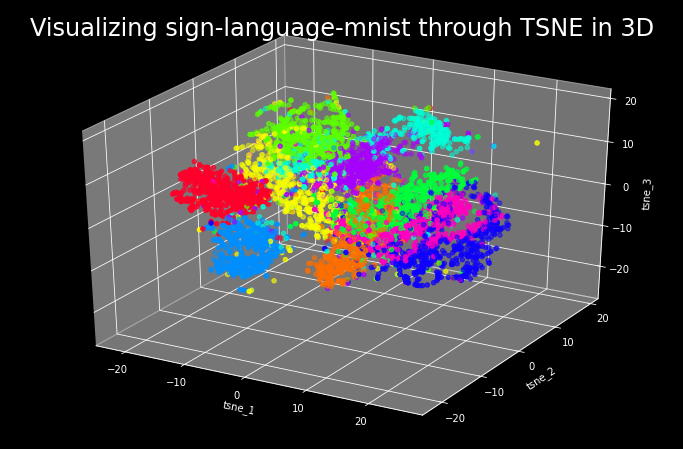

In [78]:
#Visualising t-SNE 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1],tsne_data[:,2], c=labels_1000, cmap='gist_rainbow')
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3')
plt.title('Visualizing sign-language-mnist through TSNE in 3D', fontsize=24);
plt.show()

In [ ]:
### See the difference using both plots (one shows color bar other color), we need the first one

In [1]:
fig = px.scatter_3d(x=tsne_data[:, 0], y=tsne_data[:, 1],z=tsne_data[:,2],
              color=labels_1000,size_max=40)
fig.update_traces(marker=dict(size=4),
                  selector=dict(mode='markers'))
#fig.update_layout(height=1000, width=1000,coloraxis_showscale=True)
fig.show()

NameError: name 'px' is not defined

In [2]:
### Color bar scale not needed, legends is required, use the above one

fig = px.scatter_3d(tsne_df, x='Dim_1', y='Dim_2', z='Dim_3',
              color='label',size_max=40)

#fig.update_layout(marker=dict(size=4),margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker=dict(size=4,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

NameError: name 'px' is not defined

In [142]:
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(data_1000)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 9.743410110473633 seconds


In [152]:
fig = px.scatter(x=reducer.embedding_[:, 0], y=reducer.embedding_[:, 1],
              color=labels_1000,size_max=40)

#fig.update_layout(height=1000, width=1000,coloraxis_showscale=True)
fig.show()

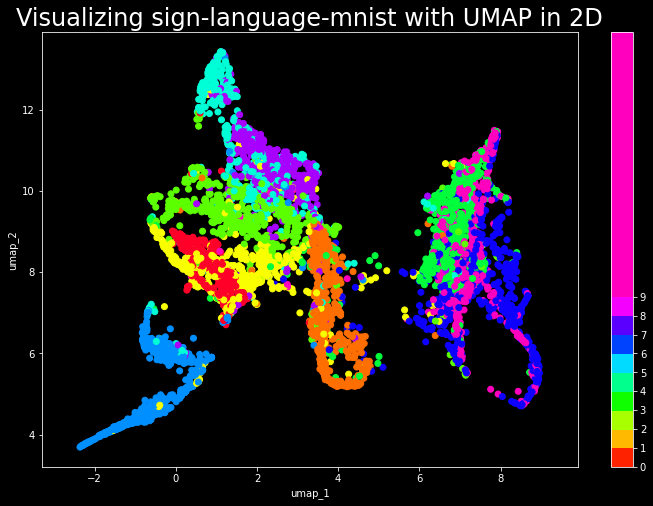

In [145]:
# Visualising UMAP in 2d
fig = plt.figure(figsize=(12,8))
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=labels_1000, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(10))
plt.xlabel('umap_1')
plt.ylabel('umap_2')
plt.title('Visualizing sign-language-mnist with UMAP in 2D', fontsize=24);

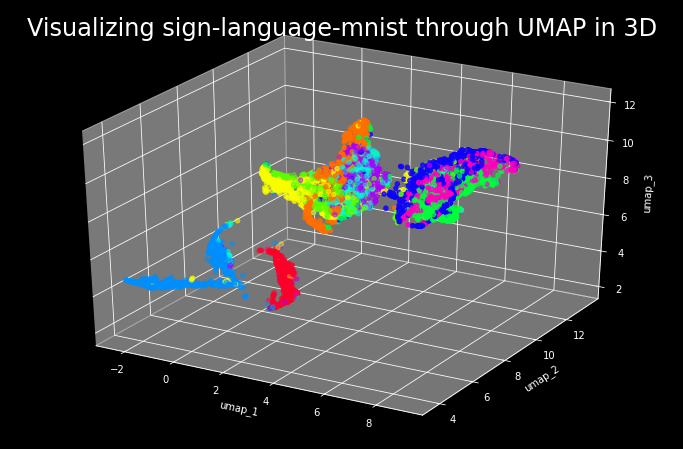

In [146]:
# Visualising UMAP in 3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1],reducer.embedding_[:, 2], c=labels_1000, cmap='gist_rainbow')
ax.set_xlabel('umap_1')
ax.set_ylabel('umap_2')
ax.set_zlabel('umap_3')
plt.title('Visualizing sign-language-mnist through UMAP in 3D', fontsize=24);
plt.show()

In [3]:
fig = px.scatter_3d(x=reducer.embedding_[:, 0], y=reducer.embedding_[:, 1], z=reducer.embedding_[:, 2],
              color=labels_1000,size_max=40)

fig.update_layout(height=1000, width=1000,coloraxis_showscale=True)
fig.show()

NameError: name 'px' is not defined

### UMAP Hyper_Parameters:

#### n_neighbors

- With a value of n_neighbors=2 we see that UMAP merely glues together small chains, but due to the narrow/local view, fails to see how those connect together. It also leaves many different components (and even singleton points). This represents the fact that from a fine detail point of view the data is very disconnected and scattered throughout the space.
- As n_neighbors is increased UMAP manages to see more of the overall structure of the data, gluing more components together, and better coverying the broader structure of the data. By the stage of n_neighbors=20 we have a fairly good overall view of the data showing how the various colors interelate to each other over the whole dataset.
- As n_neighbors increases further more and more focus in placed on the overall structure of the data. This results in, with n_neighbors=200 a plot where the overall structure (blues, greens, and reds; high luminance versus low) is well captured, but at the loss of some of the finer local sturcture (individual colors are no longer necessarily immediately near their closest color match).
- This effect well exemplifies the local/global tradeoff provided by n_neighbors.

#### min_dist
- The min_dist parameter controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation. This means that low values of min_dist will result in clumpier embeddings. This can be useful if you are interested in clustering, or in finer topological structure. Larger values of min_dist will prevent UMAP from packing point together and will focus instead on the preservation of the broad topological structure instead.
- The default value for min_dist (as used above) is 0.1. We will look at a range of values from 0.0 through to 0.99.
- Here we see that with min_dist=0.0 UMAP manages to find small connected components, clumps and strings in the data, and emphasises these features in the resulting embedding. As min_dist is increased these structures are pushed apart into softer more general features, providing a better overarching view of the data at the loss of the more detailed topological structure.

- By comparing the visualisations produced by the three models, we can see that PCA was not able to do such a good job in differentiating the signs. This is mainly because PCA is a linear projection, which means it can’t capture non-linear dependencies.
- t-SNE does a better job as compared to PCA when it comes to visualising High Dimensional datasets. Similar Hand-signs are clustered together, even though there are big agglomerates of data points on top each other from 2d perspective.
- UMAP outperformed the other two techniques in a reasonable manner if we look at the 2d and 3d plot, we can clearly see that sign languages are separated very well compared to the first two techniques. If we applied a clustering algorithm on this, we could be able to assign labels to the clusters.
- In terms of speed, UMAP is much faster than t-SNE, another problem faced by the latter is the need for another dimensionality reduction method prior, otherwise, it would take a longer time to compute, therefore we can state that UMAP is much faster than t-SNE. PCA is the fastest of them all, however, it does not do a very good job.

### Computation Speed-6000 datapoints
- PCA Duration: 0.0741569995880127 seconds
- TSNE Duration: 82.1801872253418 seconds
- UMAP Duration: 9.743410110473633 seconds    

## Summary
- We have explored three dimensionality reduction techniques for data visualization : (PCA, t-SNE, UMAP )and tried to use them to visualize a high-dimensional dataset in 2d and 3d plots.
- Based on this Tutorial for this particular use case we can say that:
- PCA did not work quite well in categorizing the different signs (24). However, instead of arbitrarily choosing the number dimensions to 3, it is much better to choose the number of dimensions that add up to a sufficiently large proportion of variance, but since this is data visualization problem that was the most reasonable thing to do.
- TSNE managed to do better work on separating the clusters, the visualization in 2d and 3d was better than PCA definitely. However, it took a very long time to compute its embeddings
- UMAP turned out to be the most effective manifold learning in terms of displaying the different clusters, some of them were very well defined and significantly faster than t-SNE implementation.